# Exploratory Data Analysis

## Data

In [181]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, data_exploring.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import fix_target

# Import the data
from data.data_extract import load_data

In [185]:
# Load the data

df_data = load_data()
df_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
# Data (as pandas dataframes)
data = df_data.copy()
X = data.iloc[:, :-1] # Features
y = data.iloc[:, -1] #Target

## Exploration

In [183]:
# Dimensions of the data
data.shape # 48842 rows and 15 columns

(48794, 15)

### Target Analysis

In [ ]:
y.head(10)

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

In [186]:
# Fix the target variable to a binary variable
data = fix_target(data)
data.head(10)
y = data.iloc[:, -1]
data.head(10)

KeyError: 'income'

In [187]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: >50K, dtype: int64

In [188]:
# Target variable distribution
y.value_counts()

>50K
0    37155
1    11687
Name: count, dtype: int64

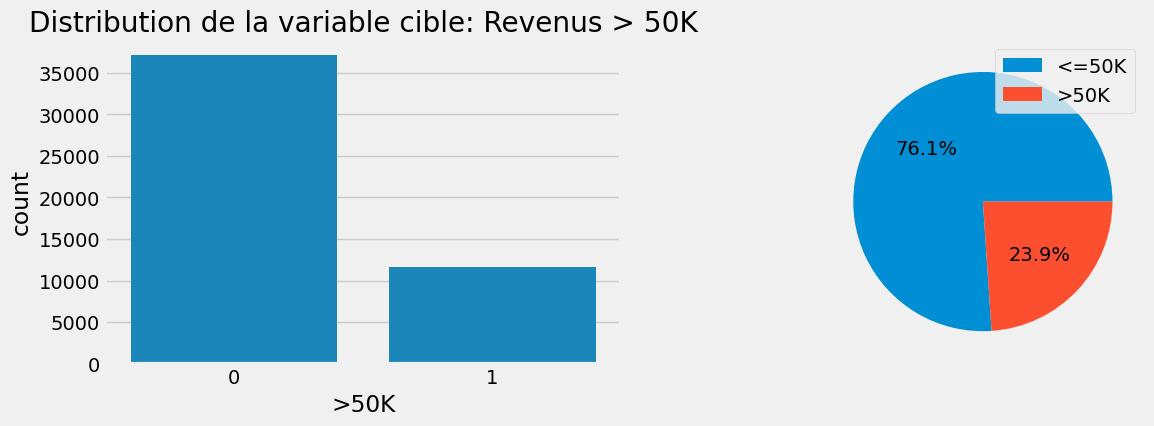

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='>50K', data=data)
plt.title("Distribution de la variable cible: Revenus > 50K")
plt.subplot(122)
plt.pie(data['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.show()

On observe un déséquilibre dans les classes : seul 1/4 des observations concernent les revenus >50K.

### Features Analysis

In [ ]:
# Information about the data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [ ]:
# Variables data types
X.dtypes.value_counts()

object    8
int64     6
Name: count, dtype: int64

On remarque qu'il ya un peu plus de variables catégorielles que de variables numériques dans les données. 

In [ ]:
#  Categorical variables
X_categ = X.select_dtypes(include=['object'])
X_categ.head(20)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [ ]:
# Values of the categorical variables
# for col in X_categ:
#     print(f'{col}: {X[col].unique()} \n')

# Values number of the categorical variables
for col in X_categ:
    print(f'{col}: {X[col].nunique()}')

# Total sum of column values 
sum = 0
for col in X_categ:
    sum += X[col].nunique()
print(f'Total sum of column values (with 6 num columns): {sum}+6 = {sum+6}')

workclass: 9
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native-country: 42
Total sum of column values (with 6 num columns): 102+6 = 108


Puisqu'il y a beaucoup de variables catégorielles, on peut penser à faire un encodage one_hot. On passera alors de 14 à 108 features. 

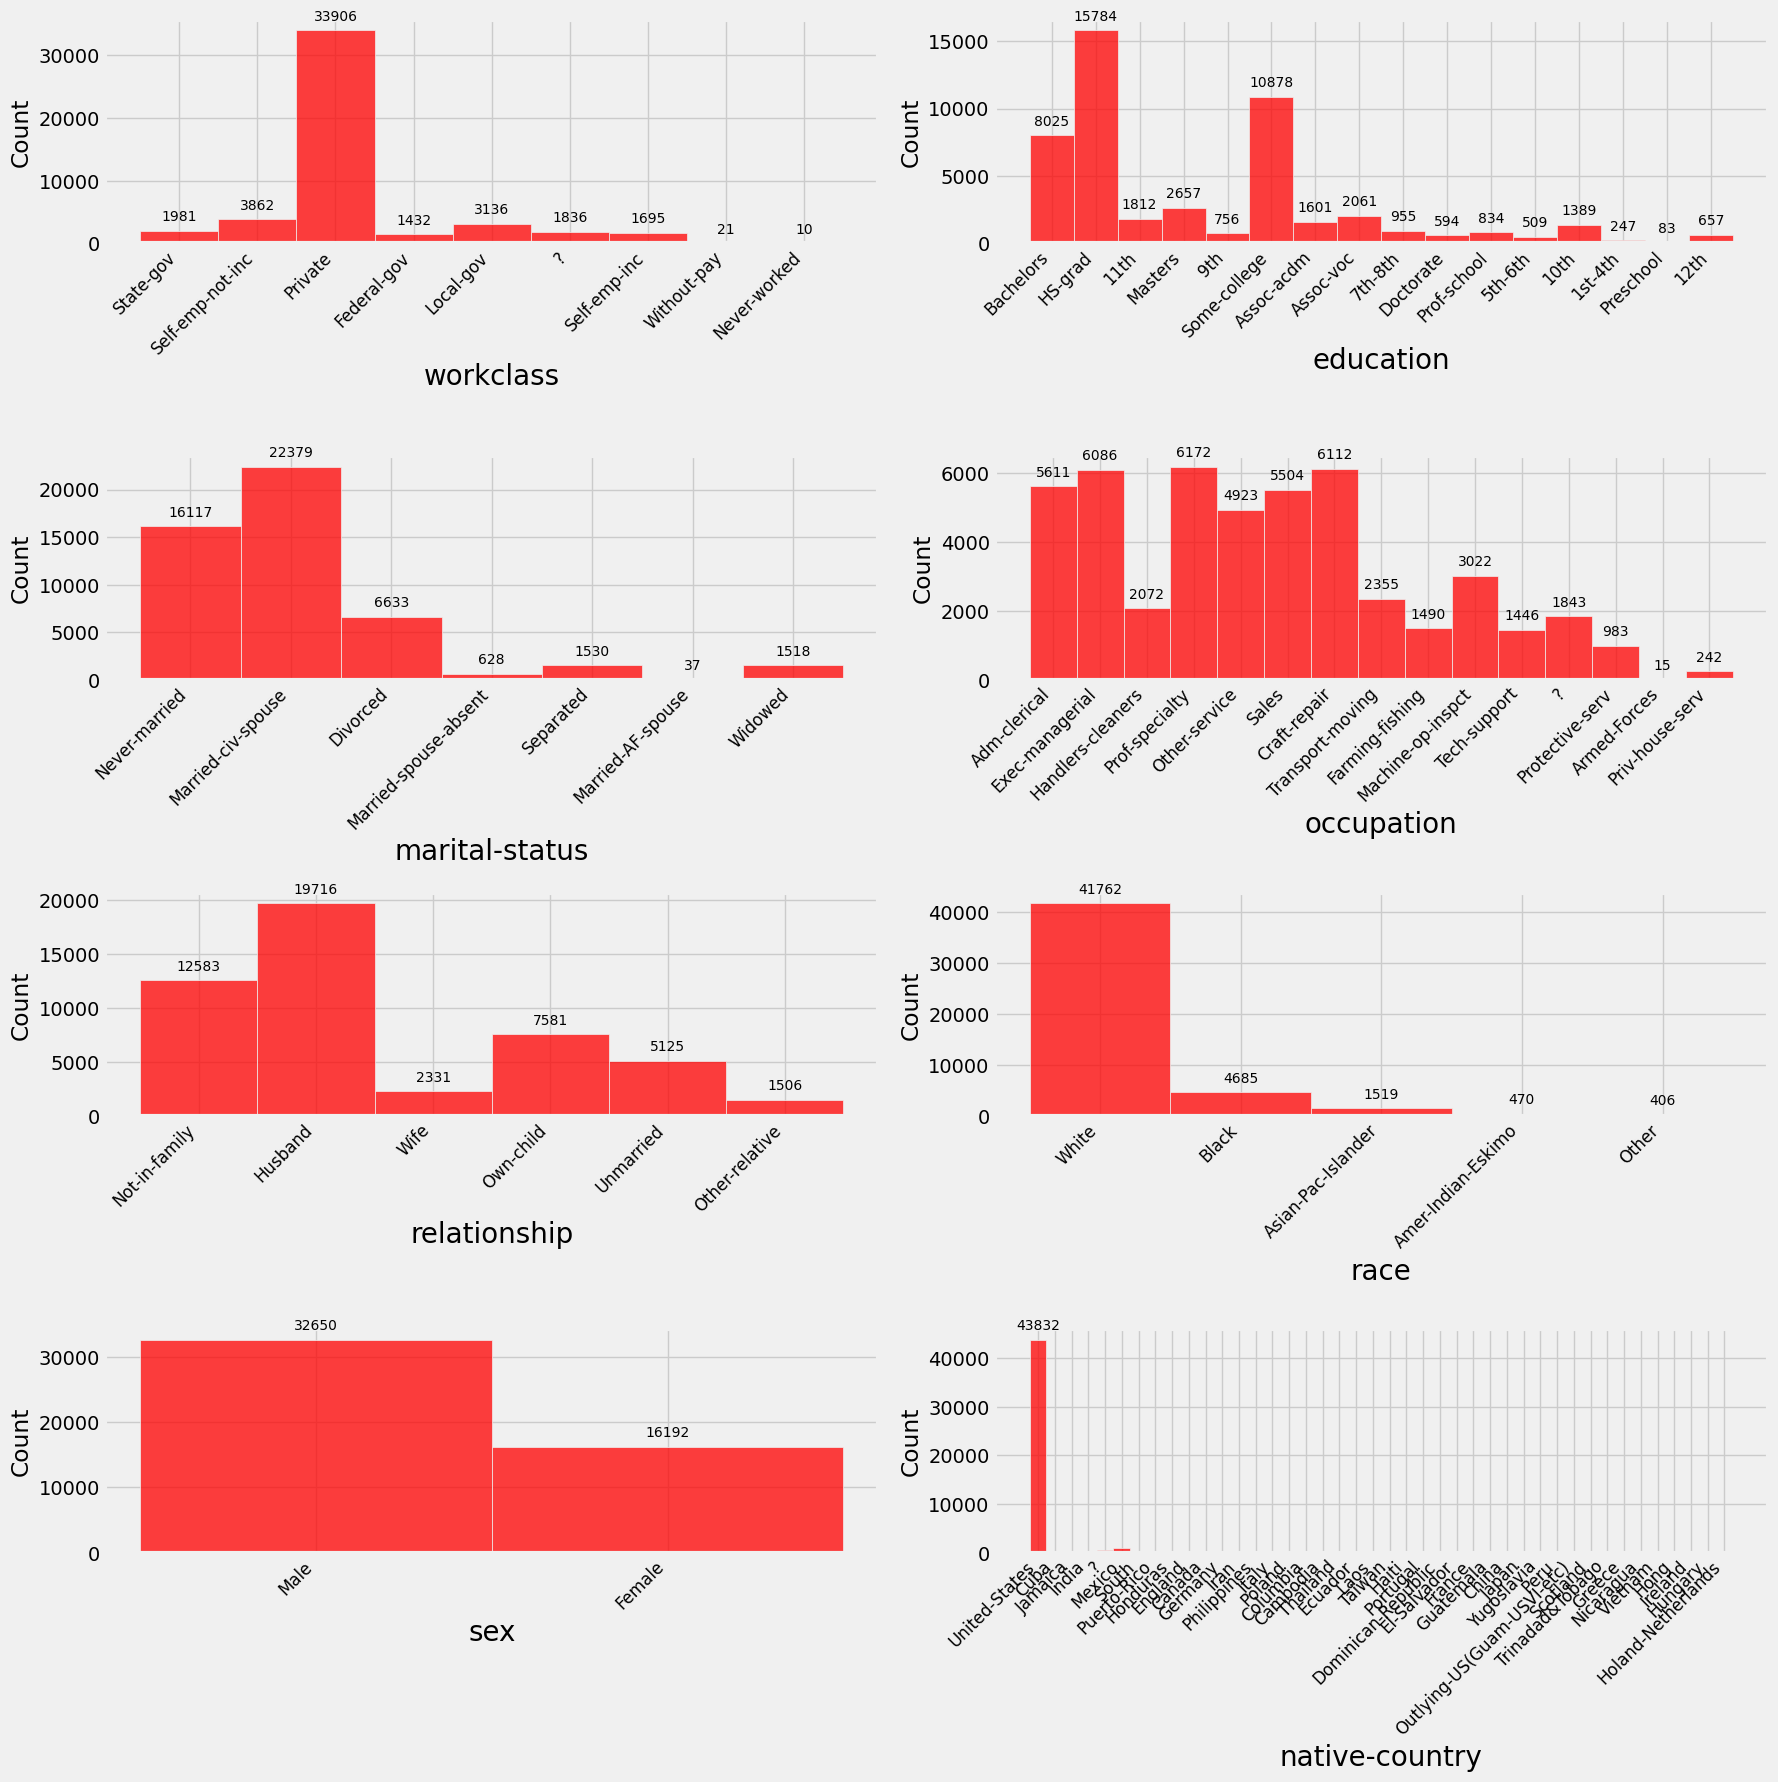

In [ ]:
# Plot the distribution of the categorical variables
plt.figure(figsize=(18, 18))
for i, feature in enumerate(X_categ):
    if i <= 7:
        ax = plt.subplot(4, 2, i + 1)
        hist = sns.histplot(data[feature], ax=ax, color="red")
        
        if i == 7:  # Si c'est le dernier graphique, afficher uniquement la valeur la plus élevée car sinon illisible
            max_height = 0
            max_p = None
            for p in hist.patches:
                height = p.get_height()
                if height > max_height:
                    max_height = height
                    max_p = p
            if max_p is not None:
                ax.annotate(f'{max_height:.0f}',
                            xy=(max_p.get_x() + max_p.get_width() / 2, max_height),
                            xytext=(0, 5),  # Décalage vertical de 5 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, color='black')
        else:  # Pour les autres graphiques, afficher toutes les valeurs
            for p in hist.patches:
                height = p.get_height()
                ax.annotate(f'{height:.0f}',
                            xy=(p.get_x() + p.get_width() / 2, height),
                            xytext=(0, 5),  # Décalage vertical de 5 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, color='black')
        
        ax.set_xlabel(feature, fontsize=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

plt.tight_layout()
plt.show()

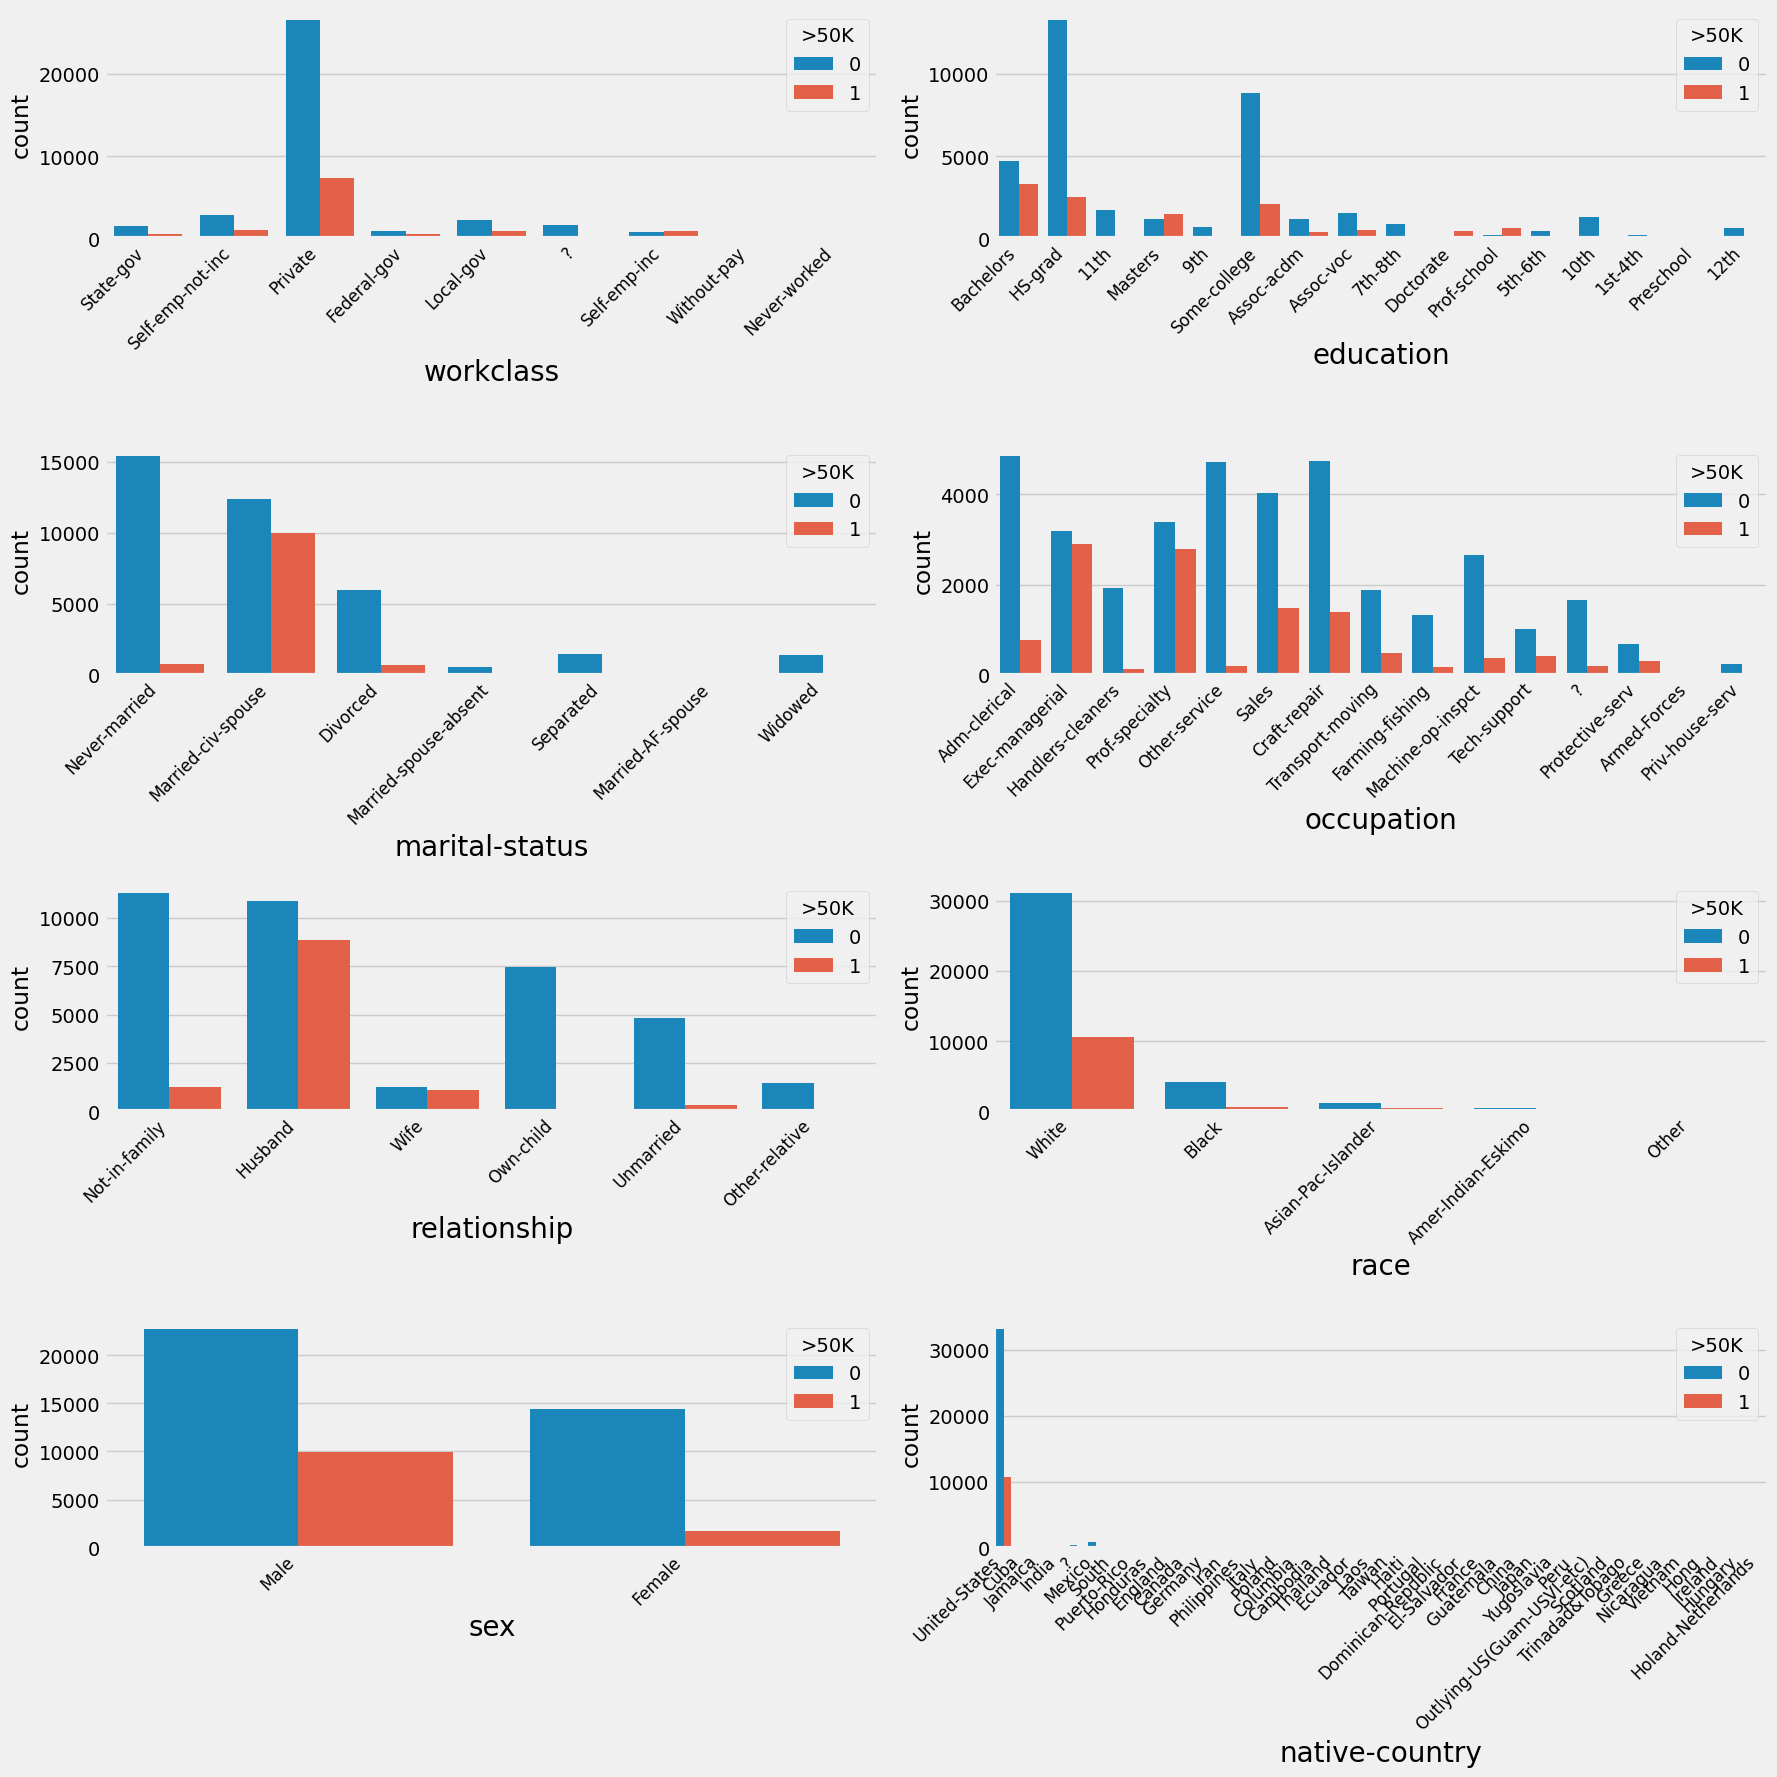

In [ ]:
# Plot the distribution of the categorical variables by target
plt.figure(figsize=(18, 18))
for i, feature in enumerate(X_categ):
    if i <= 7:
        ax = plt.subplot(4, 2, i + 1)
        sns.countplot(x=feature, hue='>50K', data=data, ax=ax)
        ax.set_xlabel(feature, fontsize=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.tight_layout()

In [ ]:
# Numerical variables
X_num = X.select_dtypes(include=['int64'])
X_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [ ]:
# Statistics of the numerical variables
X_num.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


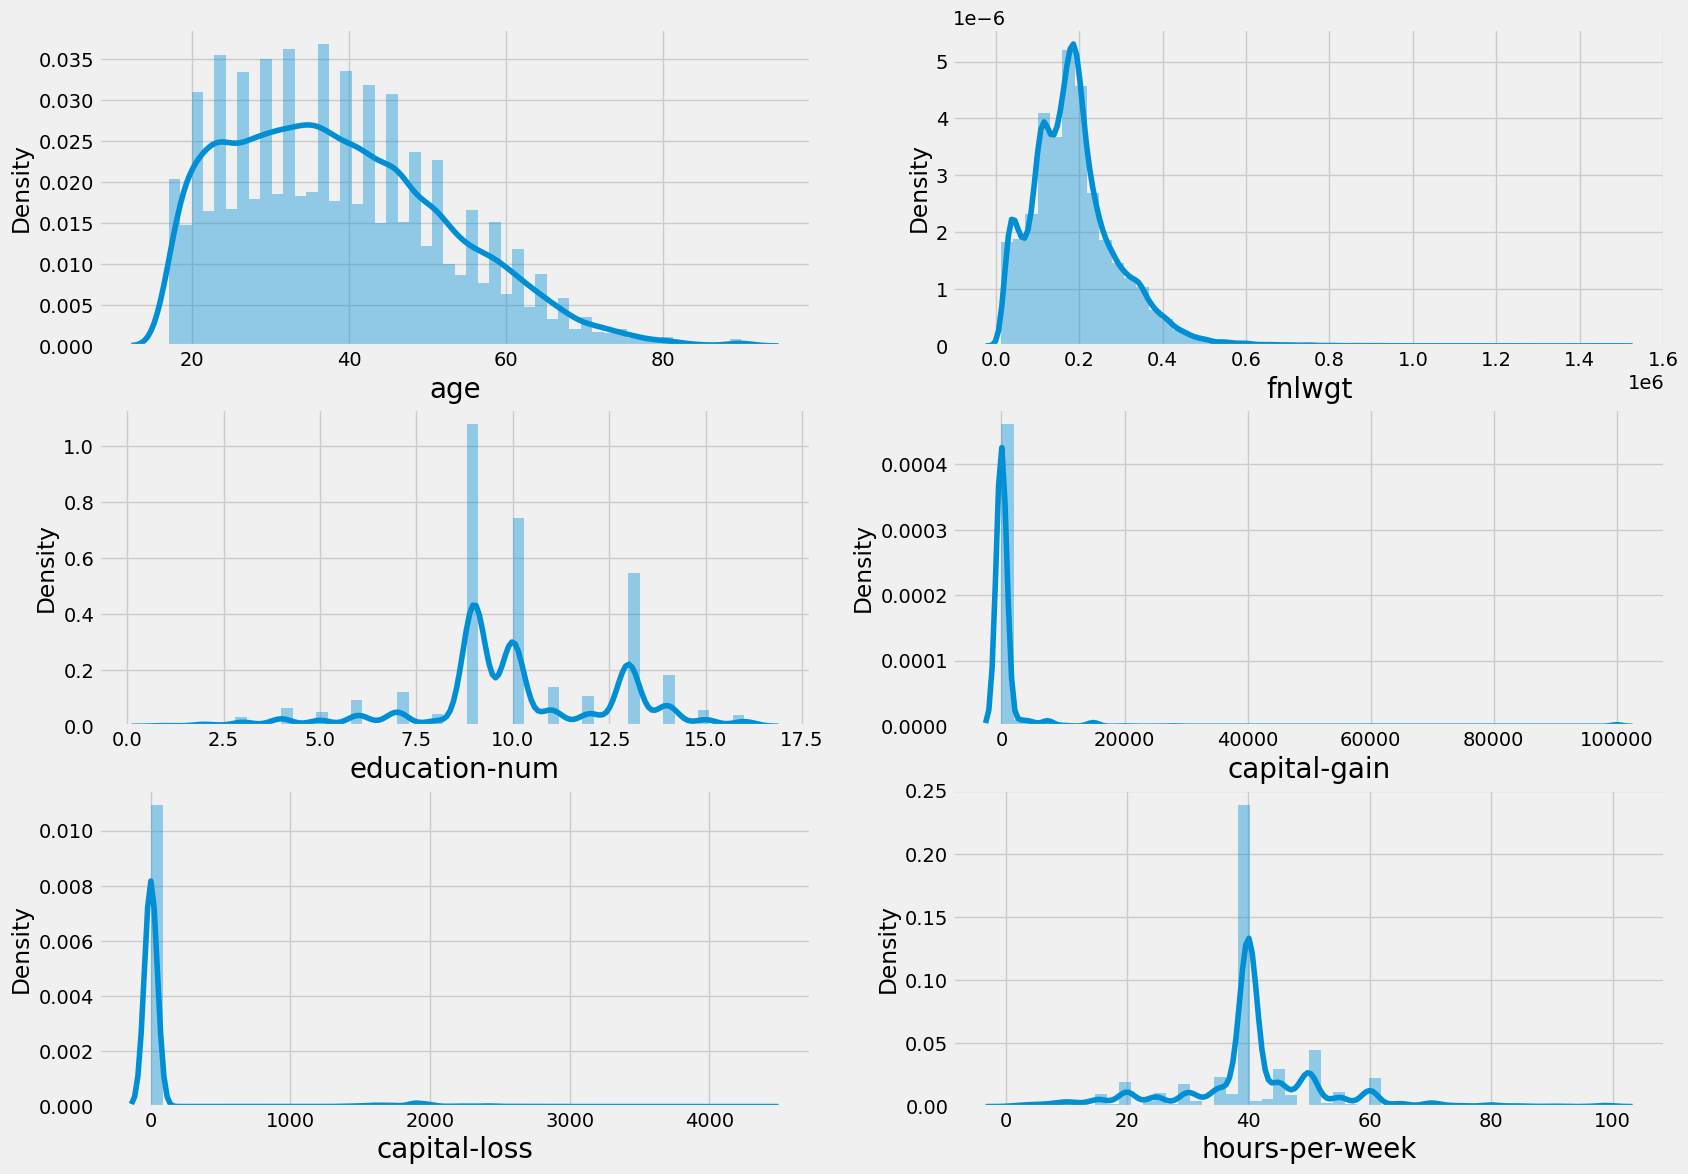

In [ ]:
plt.figure(figsize=(18,18))
for i, feature in enumerate(X_num):
    if i <= 8:
        ax = plt.subplot(4,2,i+1)
        sns.distplot(data[feature])
        plt.xlabel(feature,fontsize = 20)

plt.show()

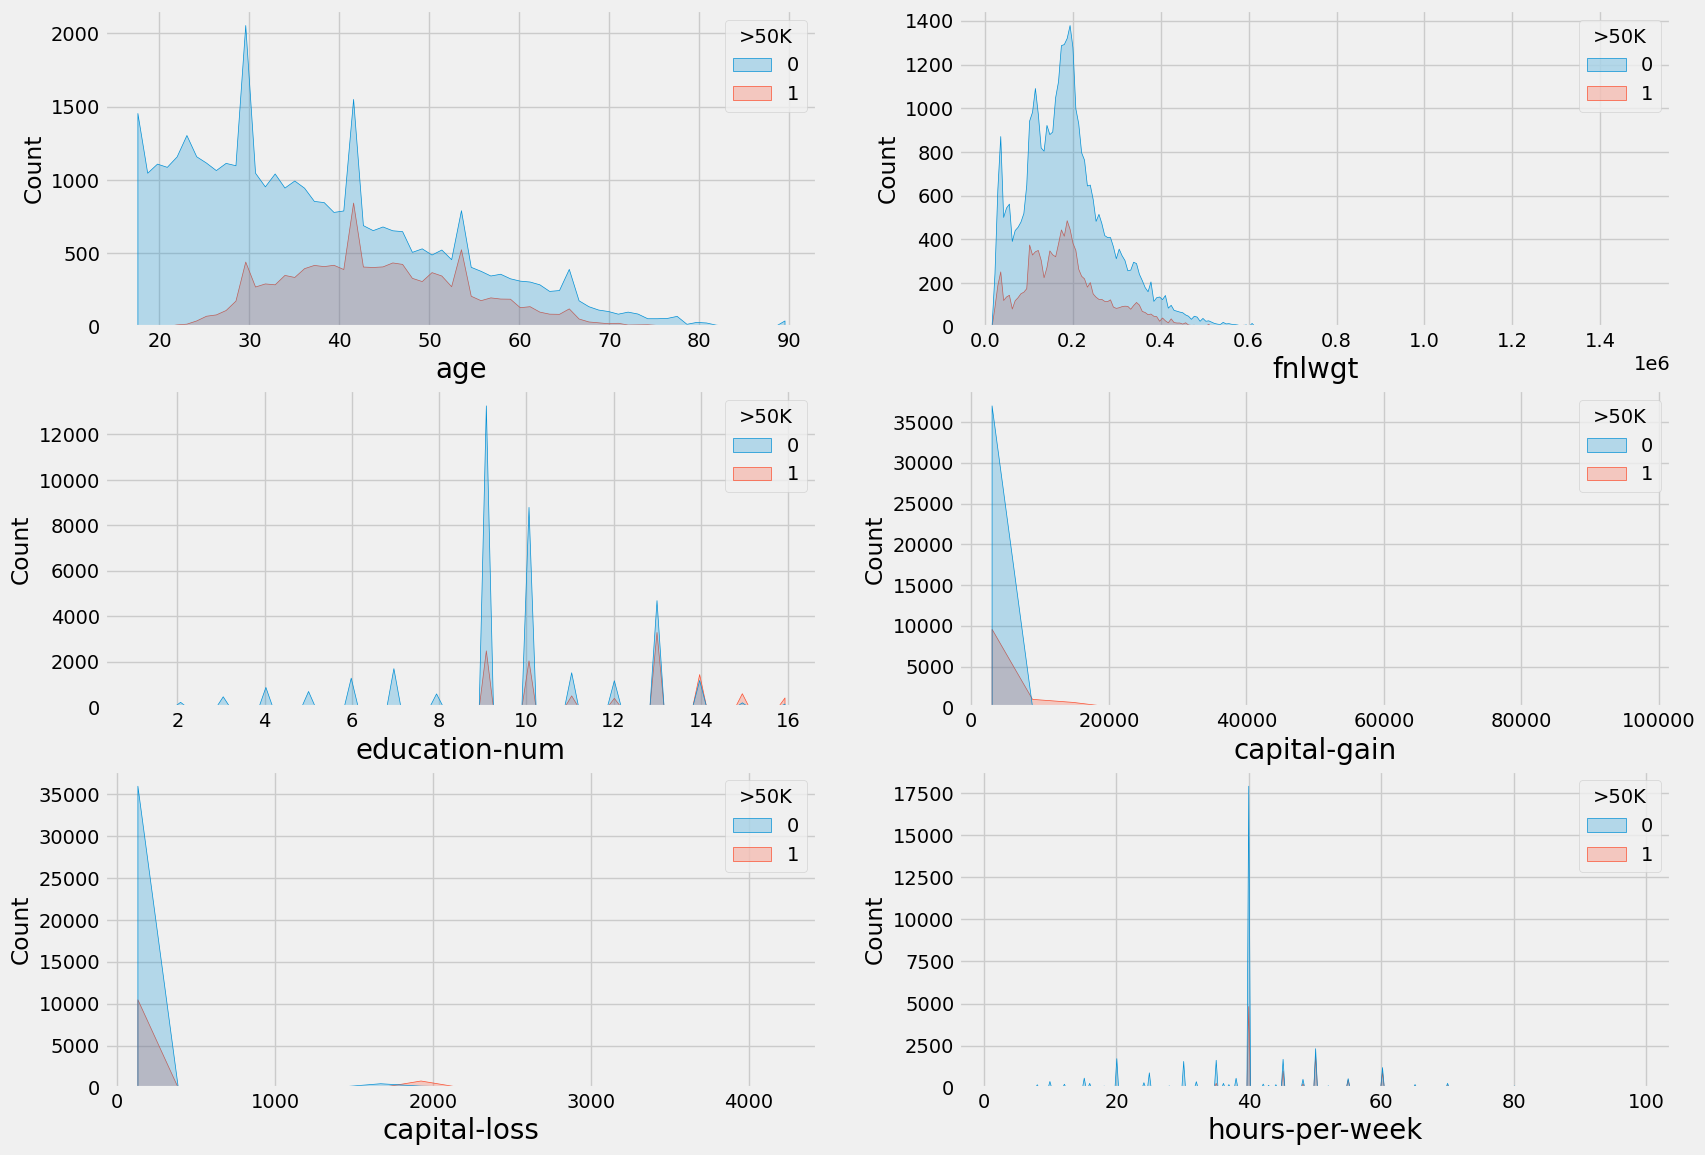

In [ ]:
# Pairplot of the numerical variables by target
plt.figure(figsize=(18,18))
for i, feature in enumerate(X_num):
    if i <= 8:
        ax = plt.subplot(4,2,i+1)
        sns.histplot(data, x=feature, hue='>50K', element='poly', ax=ax)
        plt.xlabel(feature,fontsize = 20)
plt.show()

### Duplicatas

In [ ]:
# Check for duplicate examples  
duplicate = data[data.duplicated()]
duplicate.count()

age               48
workclass         48
fnlwgt            48
education         48
education-num     48
marital-status    48
occupation        48
relationship      48
race              48
sex               48
capital-gain      48
capital-loss      48
hours-per-week    48
native-country    48
>50K              48
dtype: int64

48 lignes dans ce dataset sont dupliquées. On peut les supprimer, 48 observations sur 49000 ne vont pas énormément impacter le modèle.   

In [ ]:
# Delete duplicate examples
data = data.drop_duplicates()
data.shape

(48794, 15)

### Missing values

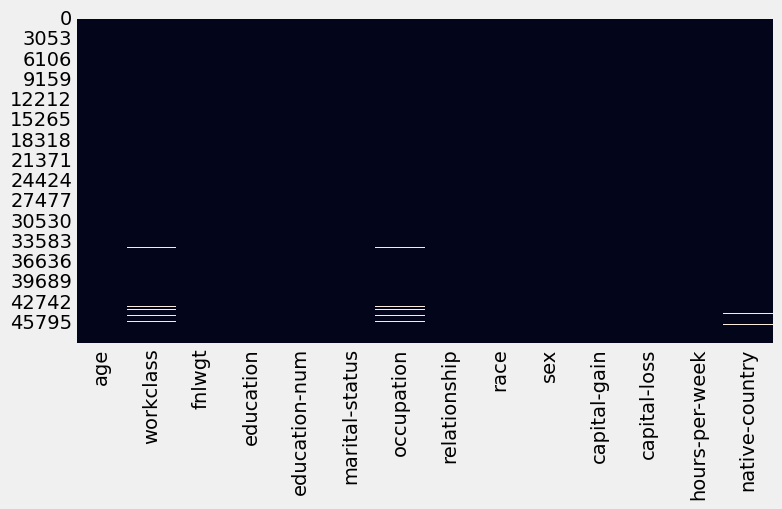

In [ ]:
# Check for missing values
plt.figure(figsize=(8, 4))
sns.heatmap(X.isna(), cbar=False)
plt.show()

In [ ]:
# How many missing values in each column
X.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [ ]:
# Percentage of missing values
miss_rates = (X.isna().sum() / X.shape[0])
miss_rates.sort_values(ascending=False)

occupation        0.019778
workclass         0.019717
native-country    0.005610
age               0.000000
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
dtype: float64

Seules 3 variables ont des valeurs manquantes avec des taux inférieurs à 2% => on décide alors de les garder pour conserver l'intégrité des données. 

### Outliers

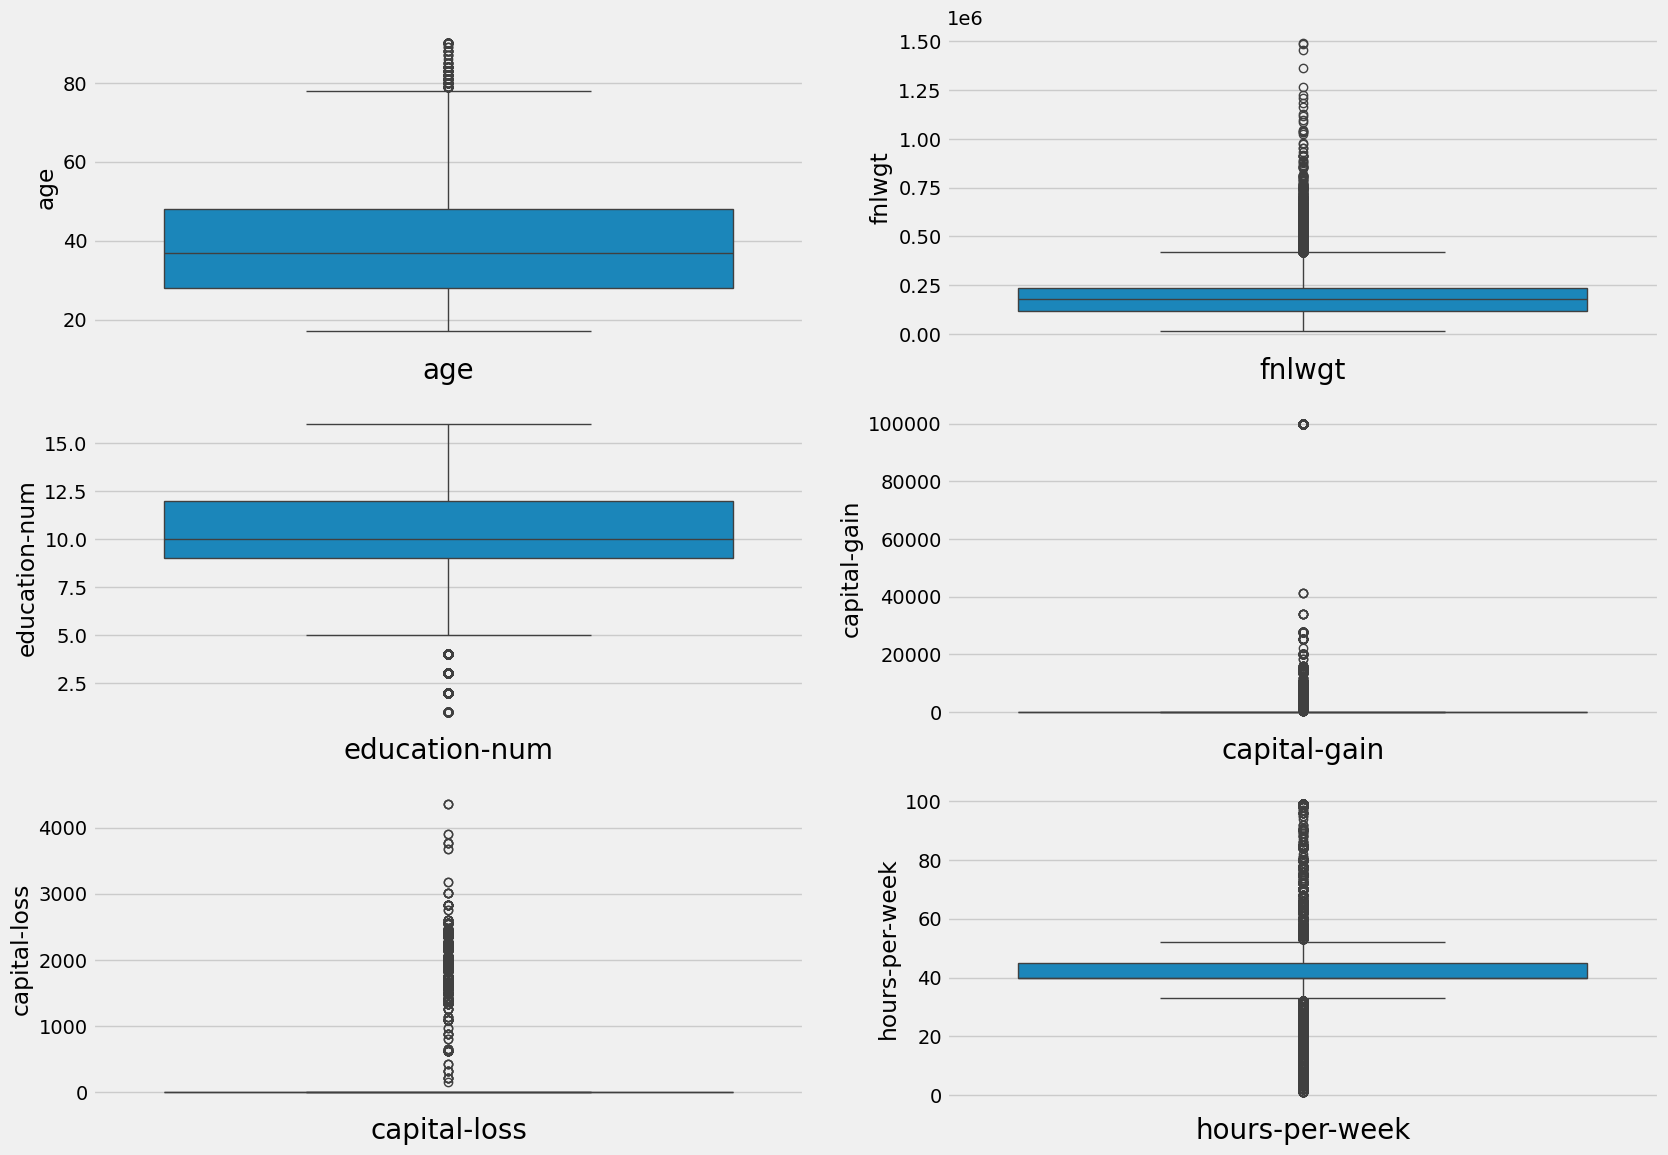

In [ ]:
# Display outliers for numerical variables
plt.figure(figsize=(18, 18))
for i, feature in enumerate(X_num):
    if i <= 8:
        ax = plt.subplot(4, 2, i + 1)
        sns.boxplot(data[feature], ax=ax)
        plt.xlabel(feature, fontsize=20)
plt.show()

### Correlation

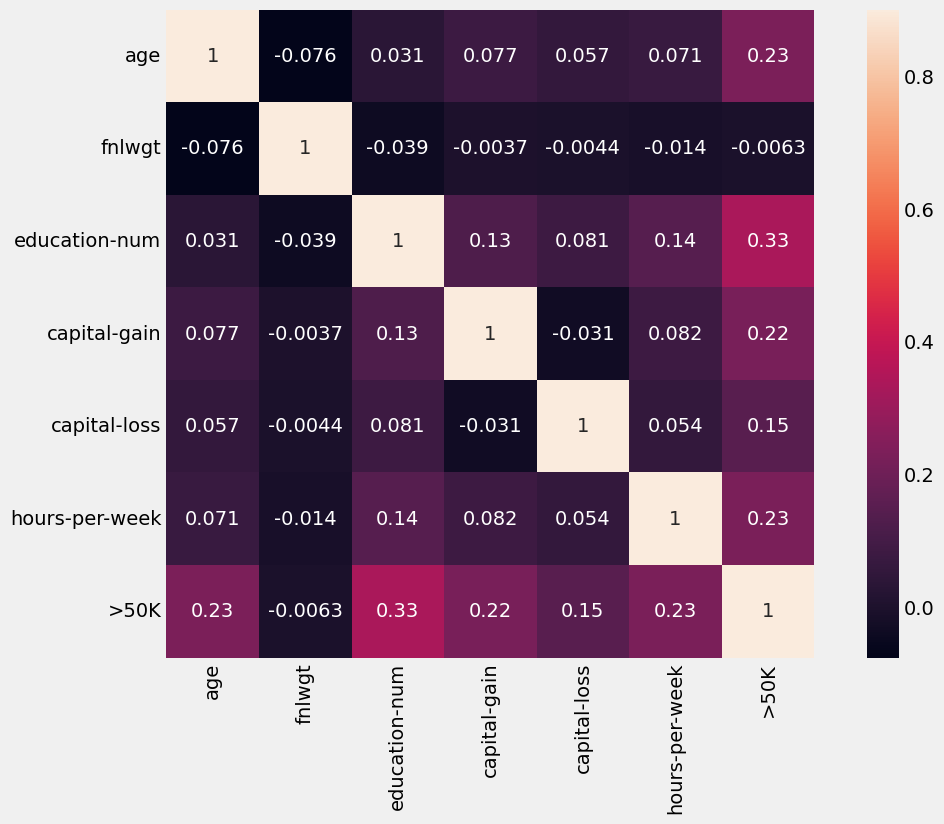

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
corrmat = data.corr(numeric_only=True)
sns.heatmap(corrmat, annot=True, cbar=True, square=True, vmax=.9) # très utile
plt.show()

<Figure size 1800x1800 with 0 Axes>

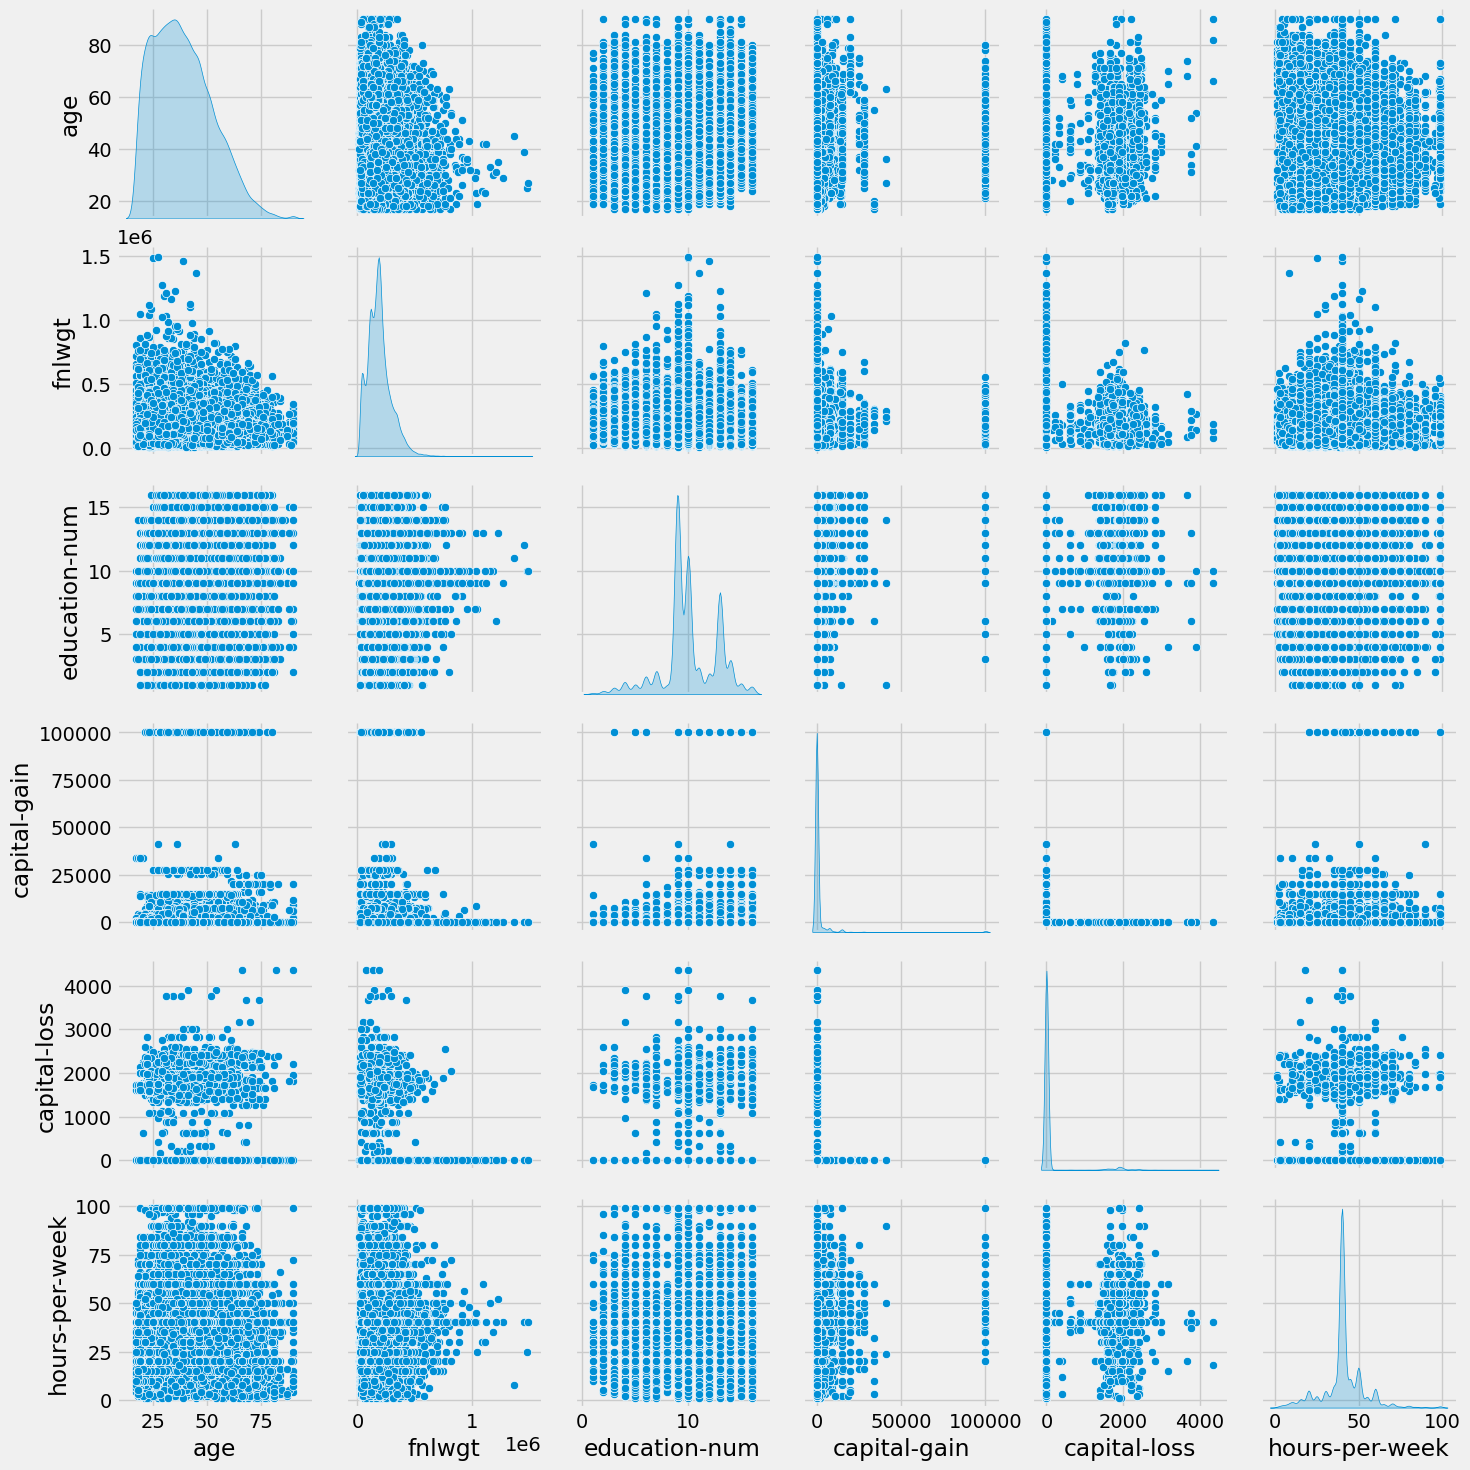

In [ ]:
# Pairplot of the numerical variables
plt.figure(figsize=(18,18))
sns.pairplot(data[X_num.columns], diag_kind='kde')
plt.show()

On observe aucucne corrélation entre les données.

### Bivariate Analysis

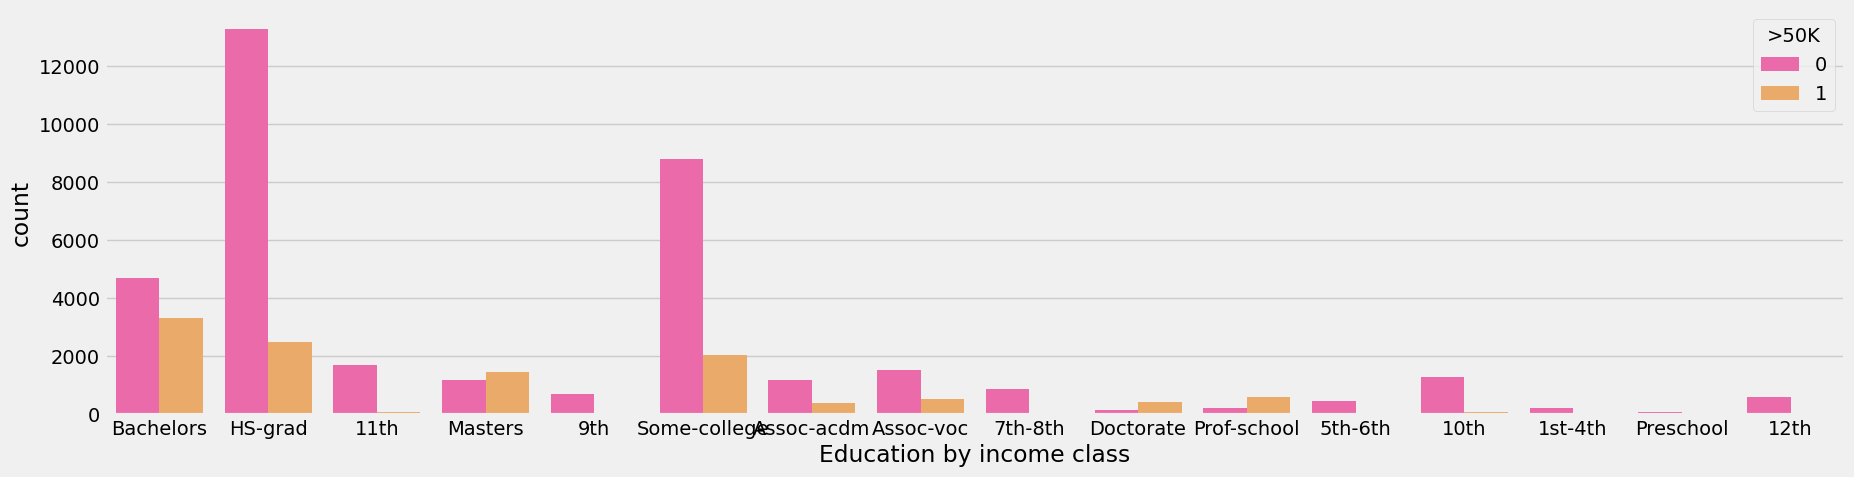

In [ ]:
# Proportion of income classes accross education level
plt.figure(figsize=(20,5))
sns.countplot(x='education', data=data, hue='>50K', palette='spring')
plt.xlabel("Education by income class")
plt.show()

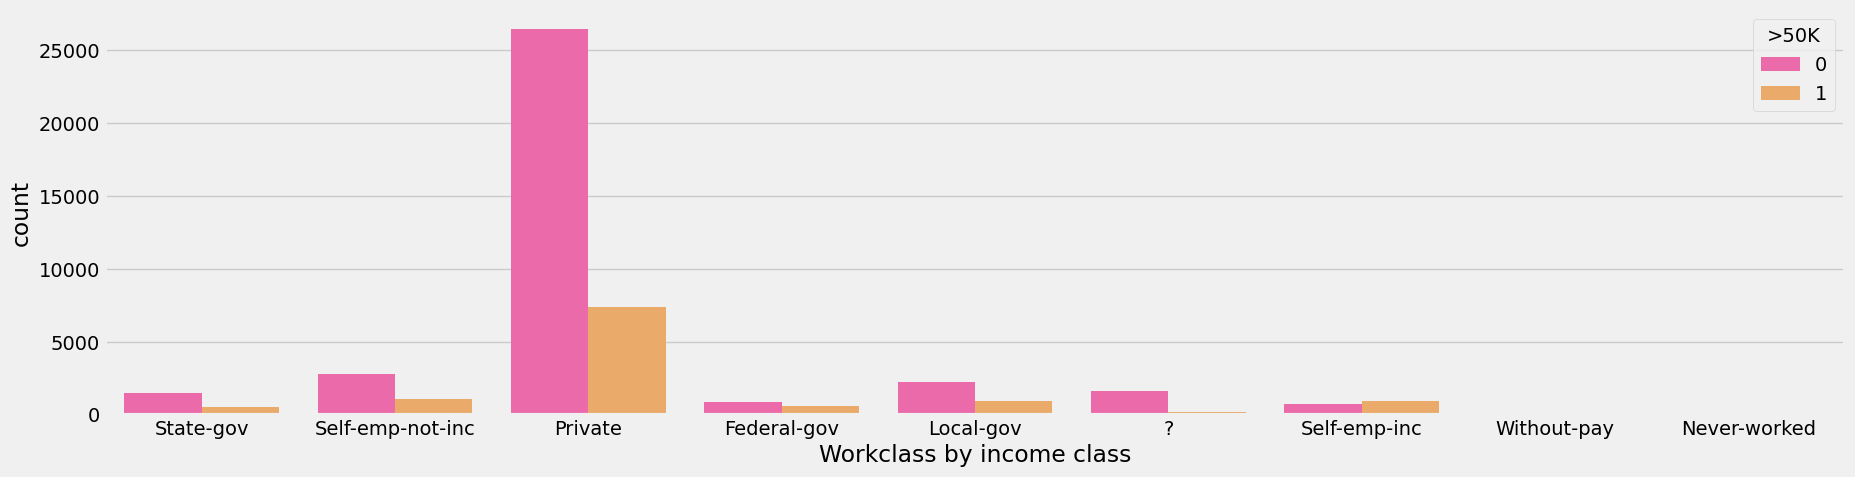

In [ ]:
# Proportion of income classes accross workclass
plt.figure(figsize=(20,5))
sns.countplot(x='workclass', data=data, hue='>50K', palette='spring')
plt.xlabel("Workclass by income class")
plt.show()

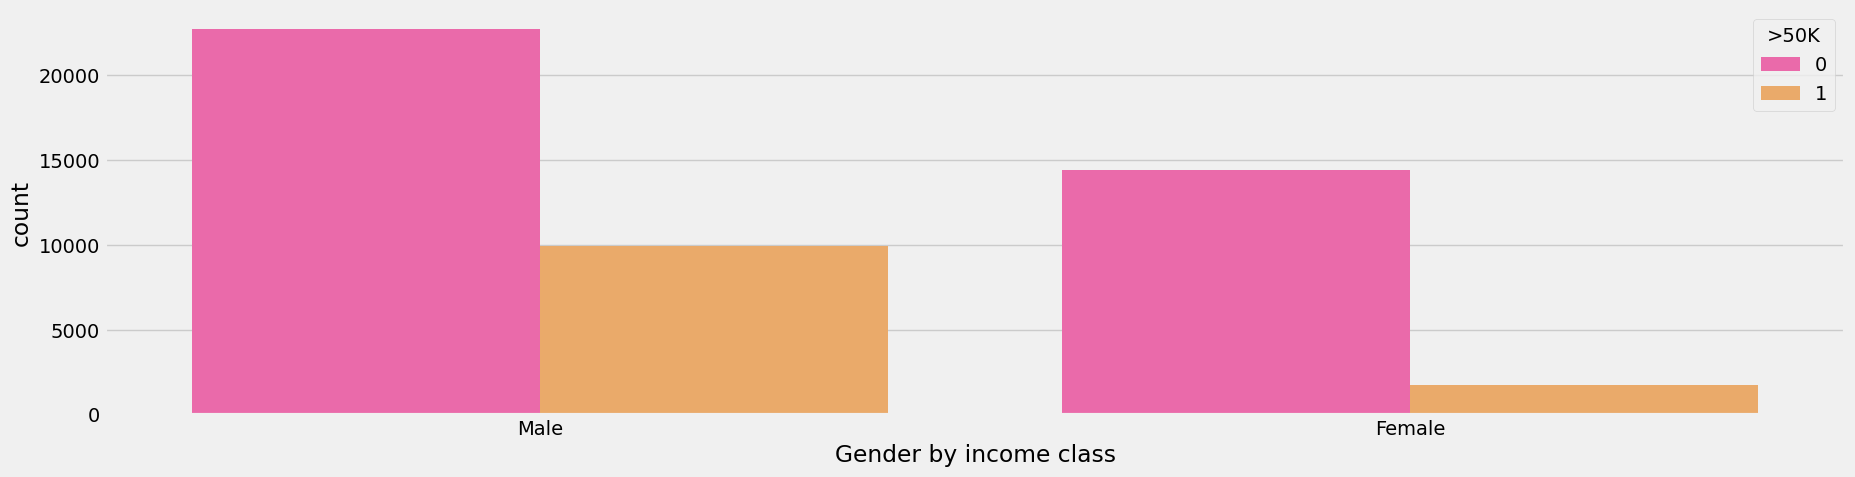

In [ ]:
# Proportion of income classes accross gender
plt.figure(figsize=(20,5))
sns.countplot(x='sex', data=data, hue='>50K', palette='spring')
plt.xlabel("Gender by income class")
plt.show()

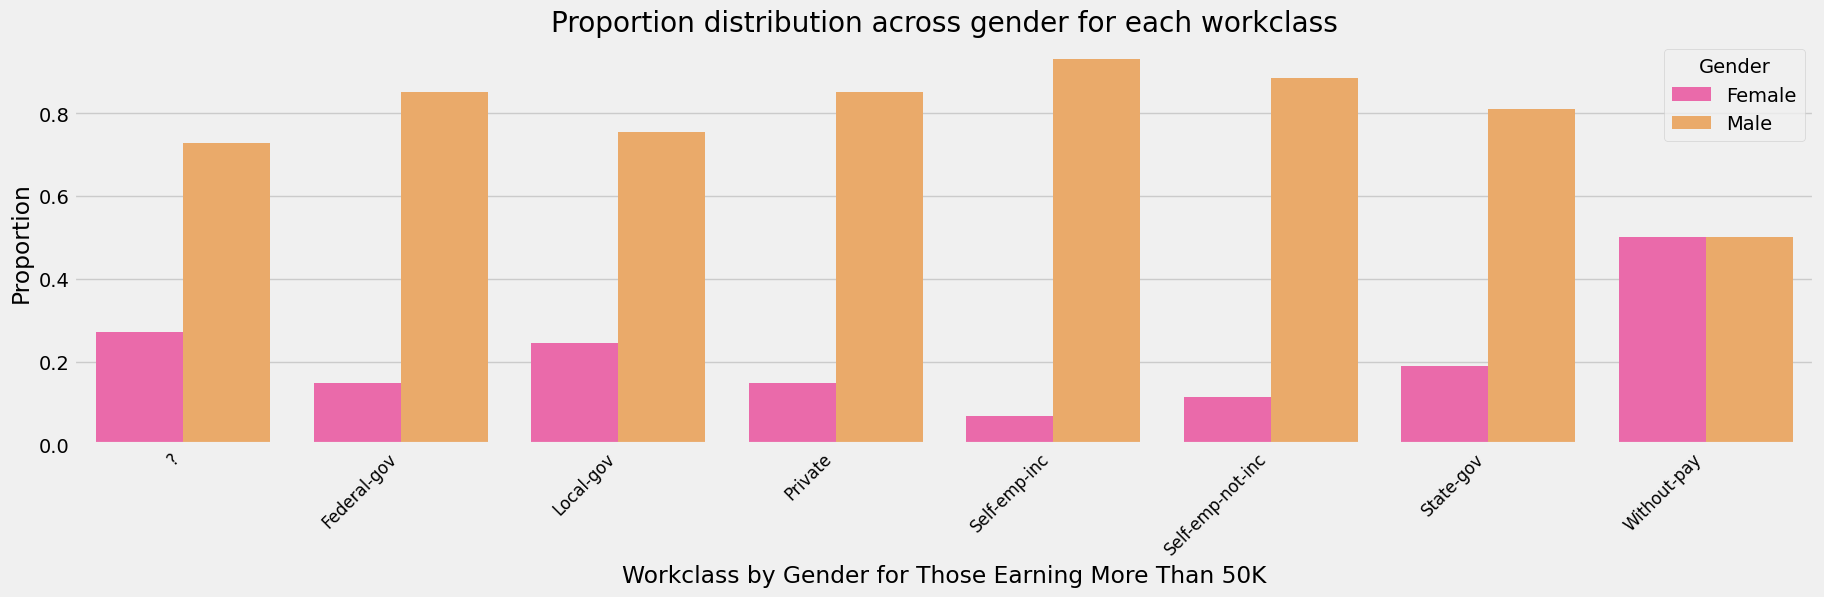

In [193]:
# Proportion distribution accross gender for each workclass for those earning more than 50K

# Filter the data for those earning more than 50K
filtered_data = data[data['>50K'] == 1]

# Calculate proportions
proportion_data = filtered_data.groupby(['workclass', 'sex']).size().reset_index(name='count')
total_counts = proportion_data.groupby('workclass')['count'].transform('sum')
proportion_data['proportion'] = proportion_data['count'] / total_counts

# Plot
plt.figure(figsize=(20, 5))
sns.barplot(x='workclass', y='proportion', hue='sex', data=proportion_data, palette='spring')
plt.xlabel("Workclass by Gender for Those Earning More Than 50K")
plt.ylabel("Proportion")
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title("Proportion distribution across gender for each workclass")
plt.legend(title='Gender')
plt.show()

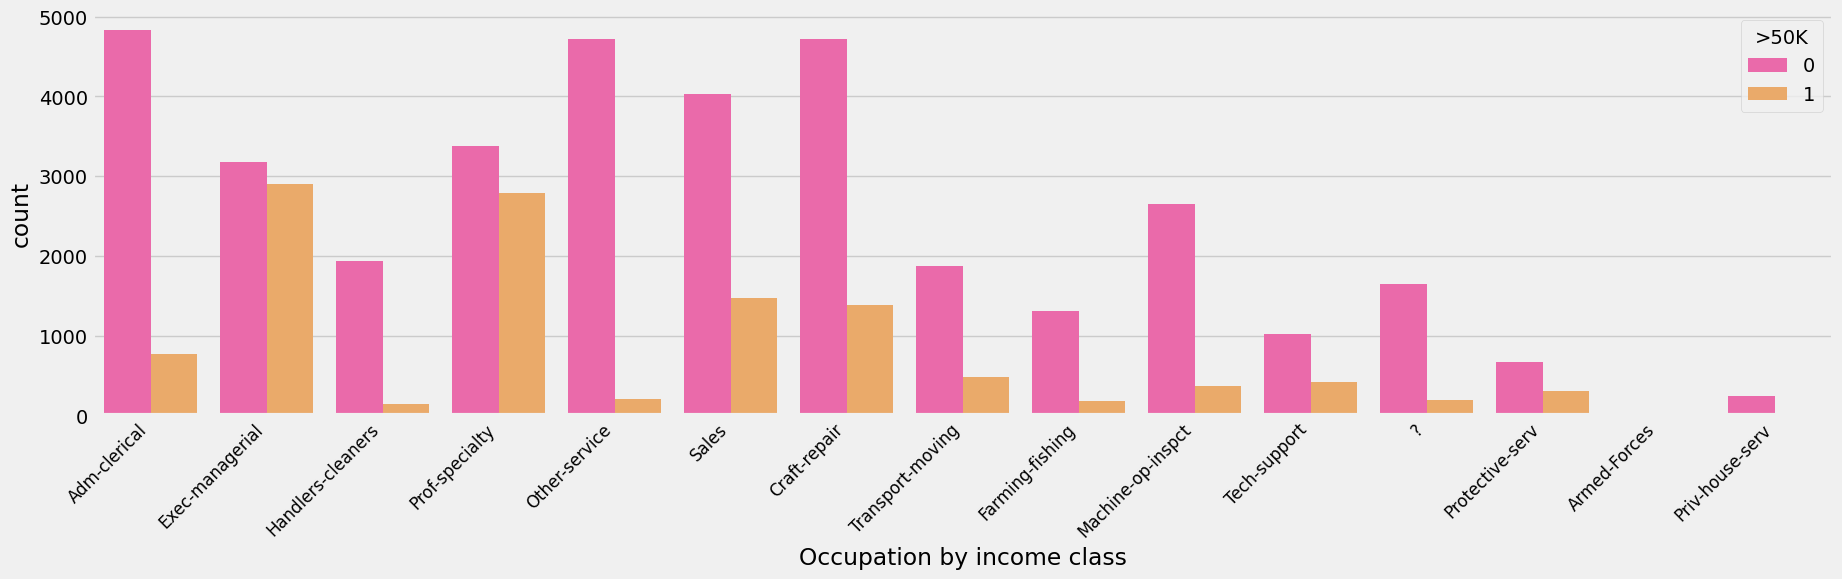

In [ ]:
# Proportion of income classes by occupation
plt.figure(figsize=(20,5))
sns.countplot(x='occupation', data=data, hue='>50K', palette='spring')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.xlabel("Occupation by income class")
plt.show()

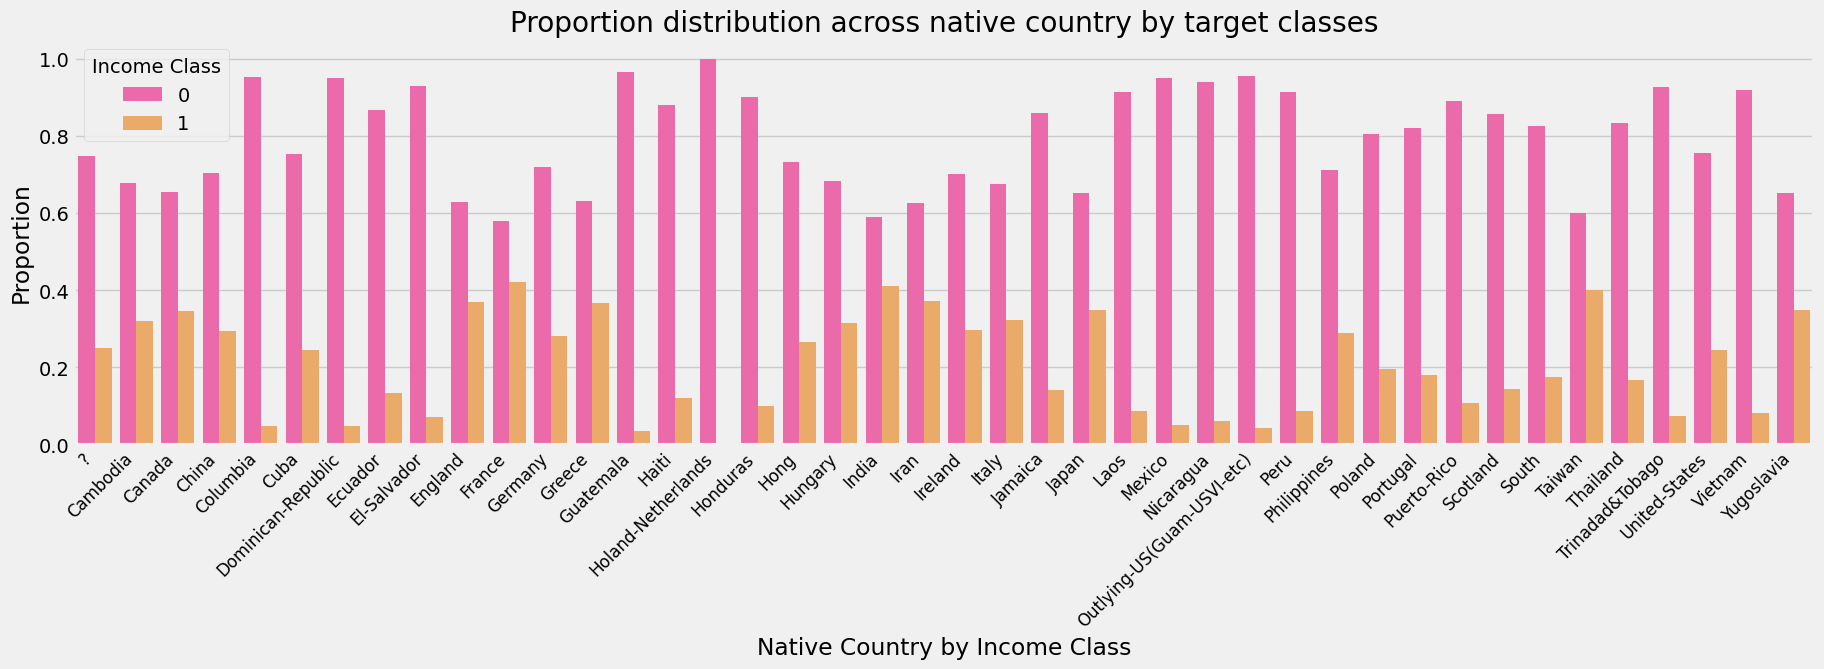

In [195]:
# Proportion of income classes by Native Country

# Calculate proportions
proportion_data = data.groupby(['native-country', '>50K']).size().reset_index(name='count')
total_counts = proportion_data.groupby('native-country')['count'].transform('sum')
proportion_data['proportion'] = proportion_data['count'] / total_counts

# Plot
plt.figure(figsize=(20, 5))
bar_plot = sns.barplot(x='native-country', y='proportion', hue='>50K', data=proportion_data, palette='spring')
plt.xlabel("Native Country by Income Class")
plt.ylabel("Proportion")
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title("Proportion distribution across native country by target classes")
plt.legend(title='Income Class')
plt.show()

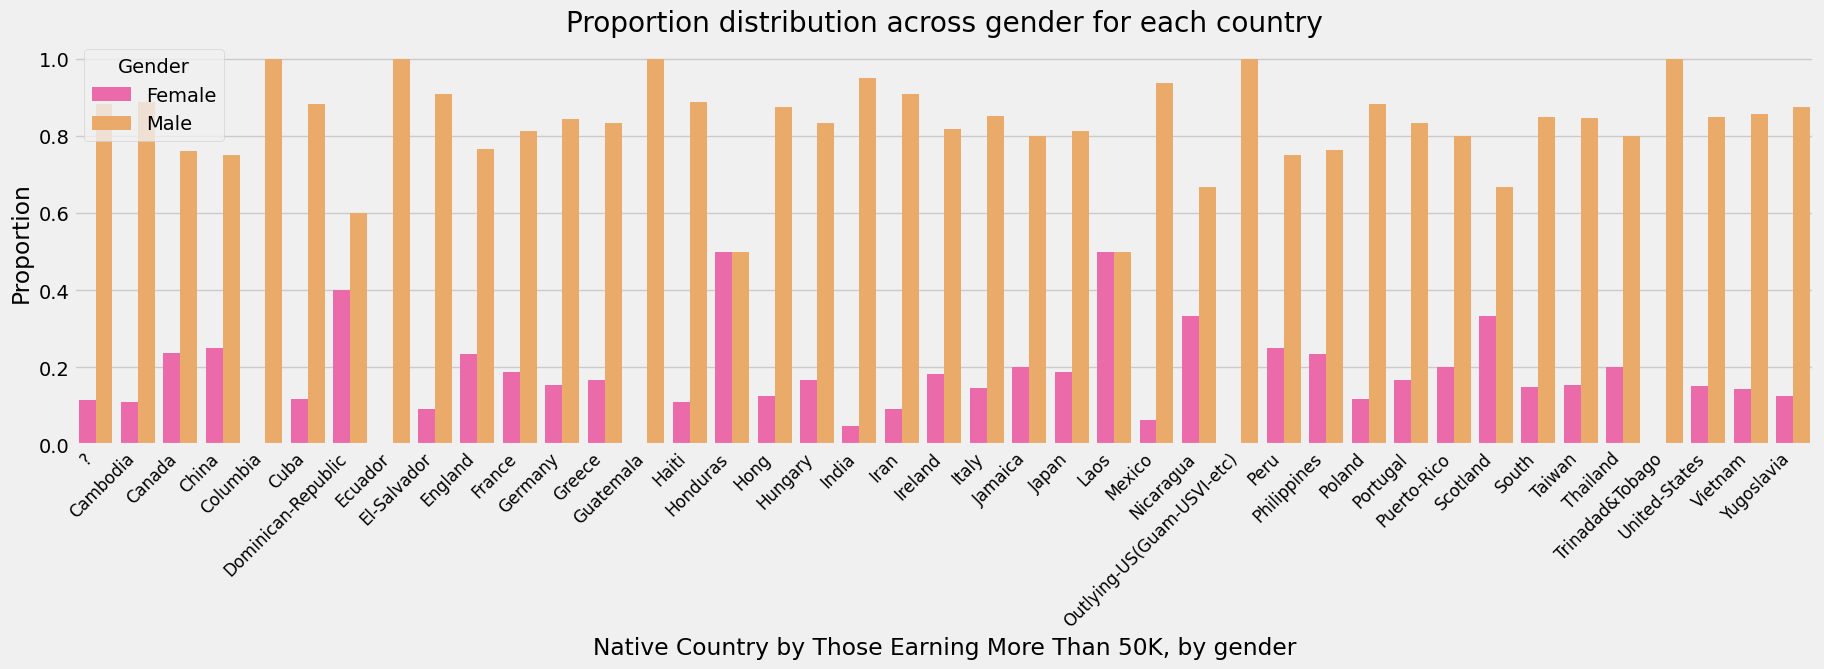

In [197]:
# Proportion distribution accross gender for each country for those earning more than 50K

# Filter the data for those earning more than 50K
filtered_data = data[data['>50K'] == 1]

# Calculate proportions
proportion_data = filtered_data.groupby(['native-country', 'sex']).size().reset_index(name='count')
total_counts = proportion_data.groupby('native-country')['count'].transform('sum')
proportion_data['proportion'] = proportion_data['count'] / total_counts

# Plot
plt.figure(figsize=(20, 5))
sns.barplot(x='native-country', y='proportion', hue='sex', data=proportion_data, palette='spring')
plt.xlabel("Native Country by Those Earning More Than 50K, by gender")
plt.ylabel("Proportion")
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title("Proportion distribution across gender for each country")
plt.legend(title='Gender')
plt.show()

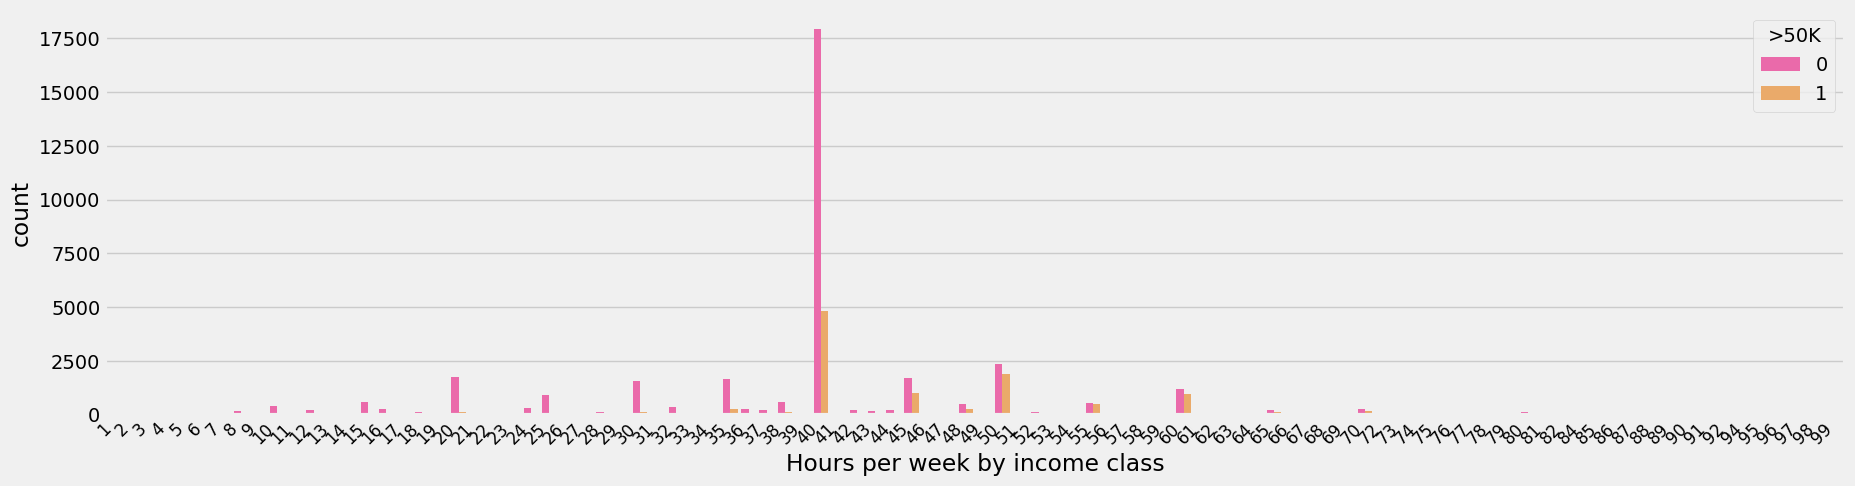

In [199]:
# Hours per week by income
plt.figure(figsize=(20,5))
sns.countplot(x='hours-per-week', data=data, hue='>50K', palette='spring')
plt.xlabel("Hours per week by income class")
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.show()

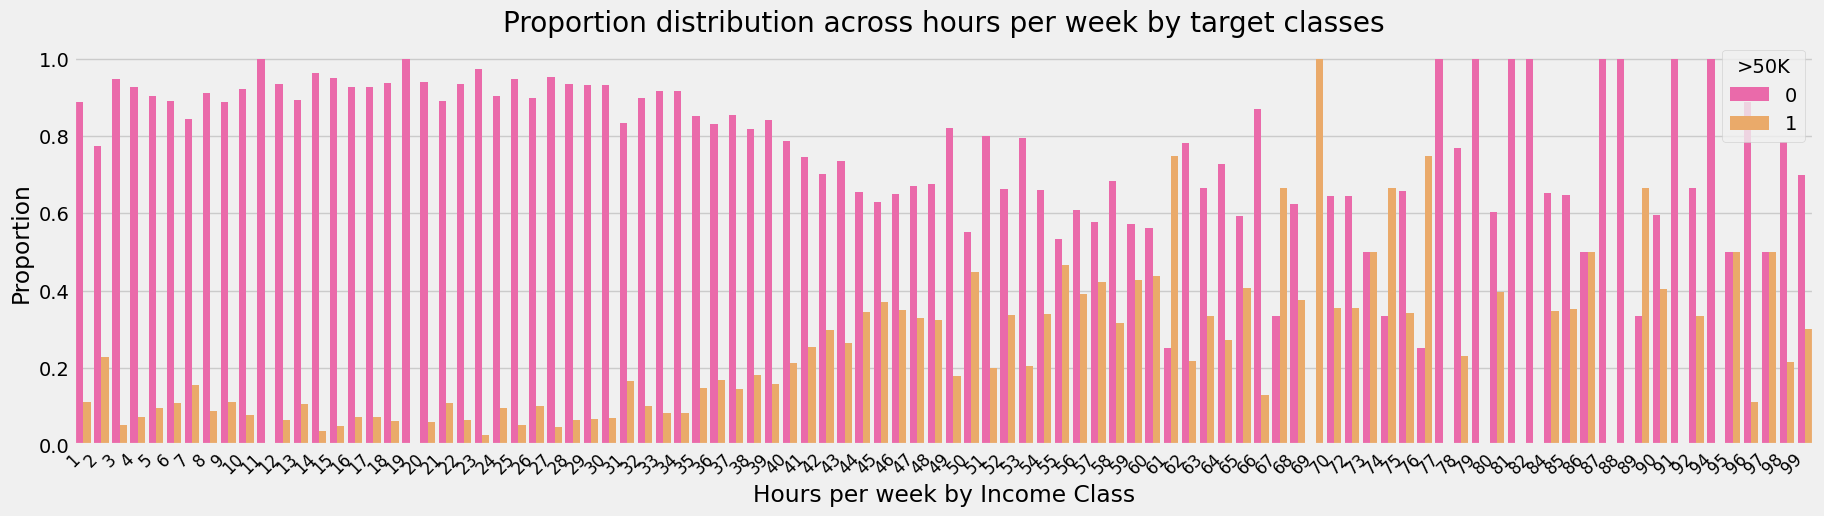

In [201]:
# Proportion of income classes by Hours per week

# Calculate proportions
proportion_data = data.groupby(['hours-per-week', '>50K']).size().reset_index(name='count')
total_counts = proportion_data.groupby('hours-per-week')['count'].transform('sum')
proportion_data['proportion'] = proportion_data['count'] / total_counts

# Plot
plt.figure(figsize=(20, 5))
bar_plot = sns.barplot(x='hours-per-week', y='proportion', hue='>50K', data=proportion_data, palette='spring')
plt.xlabel("Hours per week by Income Class")
plt.ylabel("Proportion")
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title("Proportion distribution across hours per week by target classes")
plt.legend(title='>50K')
plt.show()

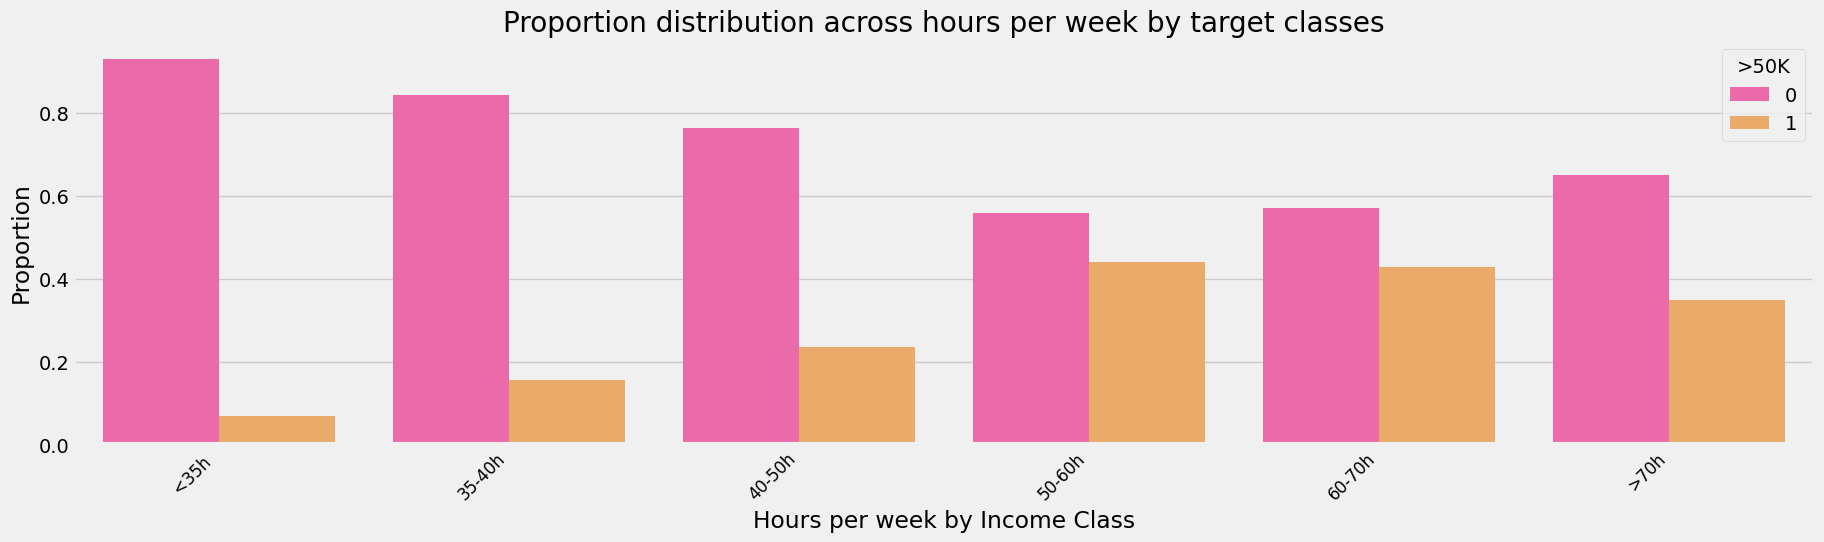

In [207]:
# Proportion of income classes by Hours per week (categorized)

bins = [0, 35, 40, 50, 60, 70, float('inf')]
labels = ['<35h ', '35-40h', '40-50h', '50-60h', '60-70h', '>70h']

# Create a new column for binned hours-per-week

data['hours_per_week_binned'] = pd.cut(data['hours-per-week'], bins=bins, labels=labels, right=False)

# Calculate proportions
proportion_data = data.groupby(['hours_per_week_binned', '>50K']).size().reset_index(name='count')
total_counts = proportion_data.groupby('hours_per_week_binned')['count'].transform('sum')
proportion_data['proportion'] = proportion_data['count'] / total_counts

# Plot
plt.figure(figsize=(20, 5))
bar_plot = sns.barplot(x='hours_per_week_binned', y='proportion', hue='>50K', data=proportion_data, palette='spring')
plt.xlabel("Hours per week by Income Class")
plt.ylabel("Proportion")
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title("Proportion distribution across hours per week by target classes")
plt.legend(title='>50K')
plt.show()

data.drop('hours_per_week_binned', axis=1, inplace=True)
